# Principal Component Analysis PCA

Consider our dataset $\boldsymbol{D}$ composed of $ \boldsymbol{x}_{1},\dots,\boldsymbol{x}_{n}$, where $\boldsymbol{x}_{i}$ is a $d$-dimensional vector. We want to find a $l$-dimensional subspace of $\mathbb{R}^{l}$, where $l<d$, such that the projection of the data onto this subspace maximizes the variance of the projected data. 
We present our dataset as a matrix $\boldsymbol{X}\in\mathbb{R}^{n\times d}$, and we want to find a matrix $\boldsymbol{W}\in\mathbb{R}^{d\times l}$ such that the projection of $\boldsymbol{X}$ onto $\boldsymbol{W}$ maximizes the variance of the projected data $\boldsymbol{Y}=\boldsymbol{X}\boldsymbol{W}$.

For simplicity, we assume that the data is centered, i.e., $\sum_{i=1}^{n}\boldsymbol{x}_{i}=\boldsymbol{0}$. The variance of the projected data is given by:<br>
$$ Var(\boldsymbol{Y})=\frac{1}{n-1}tr(\boldsymbol{Y}^{T}\boldsymbol{Y})=tr(\boldsymbol{W}\frac{1}{n-1}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{W})$$
Here, the covariance matrix of the data is given by $\boldsymbol{\Sigma}=\frac{1}{n-1}\boldsymbol{X}^{T}\boldsymbol{X}$, and the variance of the projected data is given by $tr(\boldsymbol{W}\boldsymbol{\Sigma}\boldsymbol{W}^{T})$.<br>
The problem of finding the subspace that maximizes the variance of the projected data can be formulated as:<br>
$$\max_{\boldsymbol{W}}tr(\boldsymbol{W}\boldsymbol{\Sigma}\boldsymbol{W}^{T})$$
$$s.t.\quad \boldsymbol{W}^{T}\boldsymbol{W}=\boldsymbol{I}$$
The solution of this problem is given by the eigenvectors of $\boldsymbol{\Sigma}$ corresponding to the $l$ largest eigenvalues. The proof of this result is given by **Lagrange multiplier**.

In [8]:
import numpy as np
feature_dim = 1
train_m = 100
X1 = np.random.randn(train_m, feature_dim)
X2 = 2*X1 + 0.01*np.random.randn(train_m, feature_dim)
X = np.hstack((X1, X2))
#set the mean to 0
X_mean=np.mean(X,axis=0)
X = X-X_mean
#calculate the covariance matrix
covariance_matrix = np.dot(X.T,X)/(train_m-1)
#calculate the eigenvalues and eigenvectors
eigen_values, W= np.linalg.eig(covariance_matrix)
# create a list of tuples each consisting of an eigenvalue and an eigenvector
eig_pairs = [(np.abs(eigen_values[i]), W[:, i]) for i in range(len(eigen_values))]

# sort the list of tuples from high to low in terms of eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#sorted eigenvalues and eigenvectors
eigenvalues_sorted = [eig_pairs[i][0] for i in range(len(eig_pairs))]
W_sorted = [eig_pairs[i][1] for i in range(len(eig_pairs))]
W_sorted = np.array(W_sorted).T
Y = np.dot(X,W_sorted[:,0:2])
print("eigenvalues", eigenvalues_sorted)
print("eigenvectors", W_sorted)

eigenvalues [6.061288017909482, 2.3685923016714128e-05]
eigenvectors [[-0.4471199  -0.89447403]
 [-0.89447403  0.4471199 ]]


Further we show the eigenvectors' direction to show that the eigenvectors are orthogonal to each other.

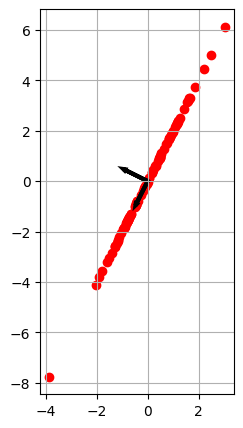

In [9]:
from matplotlib import pyplot as plt
#N = np.arange(1, train_m+1)
plt.figure(figsize=(2.5, 5))
ax = plt.axes()
plt.scatter(X[:,0],X[:,1], color='red', label='X')
#plt.plot([0, W[0,0]], [0, W[1,0]], color='red', linewidth=3)
#plt.plot([0, W[0,1]], [0, W[1,1]], color='red', linewidth=3)
ax.arrow(0, 0, W_sorted[0,0], W_sorted[1,0], length_includes_head=False,head_width=0.05, fc='b', ec='k',color=(1, 0, 0, 0.3), linewidth=3)
#ax.quiver(0,0, W[0,0], W[1,0],color=(1, 0, 0, 0.3),angles='xy', scale_units='xy', scale=1,linewidth=3)
ax.arrow(0, 0, W_sorted[0,1], W_sorted[1,1], length_includes_head=False,head_width=0.05, fc='b', ec='k', linewidth=3)
ax.grid()
plt.show()

From the figure we can conclude that the eigenvectors are orthogonal to each other, and eigenvectors captured the relationship between the features.